# **รายงาน**

**สมาชิกกลุ่ม**
กลุ่มที่ 15
1.   นายจีรัฎฐ์ โนดไธสง 6524651061
2.   นางสาวเปมิกา จันทร์เขียว 6524651285
3.   นายศิรภพ จุลละภมร 6524650089 (คนส่งรายงาน)
4.   นายวสันต์ อารัมภ์สกุล 6524651400

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt 

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import requests
from bs4 import BeautifulSoup


import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)   


**import ไลบรารี่ต่างๆที่จำเป็นที่ต้องใช้ในงานอันได้เเก่**

1.   Pandas ใช้ในการจัดการข้อมูลที่อยู่ในรูปเเบบตาราง(Data Frame)
2.   Seaborn ใช้สำหรับการทำกราฟในรูปเเบบของ 1 sheet ที่มีหลาย chart (Facet)
3.   plotly สำหรับทำกราฟที่สามารถตอบสนองได้ (Inteactive)
     * plotly express เพื่อใช้ plot chartทั่วไป
     * plotly make_subplots เพื่อสร้าง subplot
     * plotly graph objects เพื่อ plot chart ใน subplot
4.   matplotlib สำหรับการทำกราฟทั่วไป และ ใช้ร่วมกับ seaborn
5. requests เพื่อขอข้อมูลจาก websites
6. BeautifulSoup เพื่อนำข้อมูลจาก requests มาใช้
7. warnings เพื่อ ignore การแจ้งเตือน

### Scraping

In [ ]:
main_url = 'https://sgulyano.github.io/eval/'

html_url = ['02226005.html',
            '08846113.html',
            '19689783.html',
            '24363682.html',
            '24674969.html',
            '26742703.html',
            '33472214.html',
            '33561138.html',
            '33565025.html',
            '41557226.html',
            '43951333.html',
            '44868136.html',
            '45435188.html',
            '48033334.html',
            '51435303.html',
            '53231654.html',
            '60189297.html',
            '61116032.html',
            '66887754.html',
            '68346670.html',
            '71728345.html',
            '79550445.html',
            '83255004.html',
            '94026030.html',
            '95860997.html',
            '96905621.html']
eval_url = [main_url + url for url in html_url] 

def get_table_data(item): 
    data = [] 
    table_body = item.find("tbody") 
    rows = table_body.find_all("tr")    
    for row in rows :  
        cols = row.find_all(["td","th"])  
        cols = [ele.text.strip() for ele in cols] 
        data.append([ele for ele in cols if ele]) 
    return data 
    
dfs = [] 

for page in range(26): 
    r = requests.get(eval_url[page])           
    soup = BeautifulSoup(r.content,"html.parser")
    tables = soup.find_all("table")
    head = pd.DataFrame(get_table_data(tables[0]))
    section = head.iloc[1,1]


    df = pd.DataFrame(get_table_data(tables[2]))
    df.dropna(how="all",inplace=True)
    df.columns = df.iloc[1,:]
    rows = [0,1]
    df.drop(rows,axis=0,inplace=True)
    df.drop(df[df.ที่.str.contains("รวม")].index , inplace= True)

    #split topic
    df["topic"] = ""
    ind = 0
    for i in df["ที่"]:
        if len(i) > 1:
            topic = i
            df.iloc[ind,16] = topic
            ind += 1
        else:
            df.iloc[ind,16] = topic
            ind +=1 
    df.dropna(inplace= True)


  #change columns 'ร้อยละ' name
    cols = []
    count = 5
    for column in df.columns:
        if column == 'ร้อยละ':
            cols.append(f'{count}(%)')
            count-=1
            continue
        cols.append(column)
    df.columns = cols

    for i in range(2,15):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])
    df.set_index("ที่" , inplace= True)

    #add detail  to df
    df["degree"] = head.iloc[3,1]
    df["semester"] = head.iloc[2,1]  
    df["subject"] = head.iloc[0,1]
    df["section"] = head.iloc[1,1]
    df["นักศึกษาที่จดทะเบียน"] = head.iloc[4,1]
    df["นักศึกษาที่ประเมิน"] = head.iloc[5,1]
    df["url"] = eval_url[page]

    dfs.append(df)
    
# concat all df
result = pd.concat([dfs[i] for i in range(26)])



**ขั้นตอน**
* กำหนดตัวแปร main_url ใช้ดึงข้อมูลจากเว็บไซต์ https://sgulyano.github.io/eval/
* กำหนดตัวแปร html_url เพื่อเก็บ path ของแต่ละ page
* สร้างลิสต์ eval_url เพื่อนำตัวแปร main_url มาต่อกับไอดีเพื่อมาเก็บในลิสต์
* กำหนดฟังก์ชั่น get_table_data โดยมีค่าพารามิเตอร์ในฟังก์ชั่นคือ item
    * กำหนดลิสต์ว่างเก็บในตัวแปร data
    * หา tag tbody ใน item และนำไปเก็บไว้ในตัวแปร table_body
    * ใน table_body หา tr ทุกตัวแล้วนำมาเก็บไว้ในตัวแปร rows
    * ใช้คำสั่ง for loop เพื่อวนซ้ำ row แต่ละตัวใน rows
    * กำหนดตัวแปร cols เพื่อใช้ฟังก์ชั่น .find_all ในการค้นหาข้อความในฟังก์ชั่น row ทั้งหมดที่เป็น /td , /th
    * ใช้คำสั่ง strip เพื่อนำตัวเเปร cols ไปนำ tag html ออกจาก cols และลบ whitespace หน้า-หลัง แล้วนำกลับเข้าไปแทนที่ในตัวแปร cols เหมือนเดิม
    * ใช้ฟังก์ชั่น append เพื่อนำ loop ele โดยนำค่าว่างออก แล้วนำไปเก็บไว้ใน list data
    * ใช้คำสั่ง return เพื่อคืนค่า data ออกจากฟังก์ชั่น
* กำหนดลิสต์ว่างเก็บในตัวแปร dfs
* ใช้คำสั่ง for loop ทั้งหมด 26 ครั้ง (26 ลิงก์)
    * กำหนดตัวแปร soup เพื่อดึงเนื้อหาภาษา html มา
    * กำหนดตัวแปร tables เพื่อใช้ฟังก์ชั่น .find ค้นหา html tag table ใน soup
    * กำหนดตัวแปร head เพื่อใช้เก็บผลลัพธ์ของฟังก์ชั้น get_table_data ในส่วน tables[0]
    * กำหนดตัวแปร section เพื่อนำข้อมูลจาก เเถวที่ 1 คอลัมน์ 1 มาจาก head
    * กำหนดตัวแปร df เพื่อสร้าง dataframe จาด tables[2]
    * ใช้ฟังก์ชั่น .dropna how=all เพื่อลบแถว missing value เฉพาะที่เป็น missing values ทั้งแถวออก
    * ใช้ฟังก์ชั่น .columns เพื่อตั่งชื่อ columnใหม่ โดยใช้ข้อมูลจากตาราง df แถวที่ 1 ทั้งหมด
    * ใช้ฟังก์ชั่น .drop เพื่อลบแถวที่ไม่ใช้ออก
    * ลบแถวที่ index บรรจุคำว่า 'รวม' ออก
    * สร้างคอลัมน์ว่างใหม่ชื่อ topic
    * กำหนดตัวแปร ind ให้ค่าเท่ากับ 0 เพื่อใช้เป็นเลข index ตอนloop
    * วนloop คอลัมน์ “ที่” ทีละตัวไปเก็บในตัวแปร i
      * ใช้ฟังก์ชั่น if ว่าถ้าหากความยาว i มากกว่า 3 ตัวอักษร ให้ตัวแปร topic บรรจุค่า i ไว้แล้วนำ i ไปใส่ใน column topic และจึงเพิ่ม ind ไป 1
      * หาก i มีตัวอักษรน้อยกว่า 3 ให้ใส่ คอลัมน์ topic ด้วย topic ตัวก่อนหน้าและเพิ่ม ind ไป 1
    * ใช้ฟังก์ชั่น .dropna เพื่อลบทุกแถวที่เป็น missing value ออก
    * กำหนดลิสว่างเพื่อเก็บในตัวแปร cols
    * ใช้คำสั่ง count เพื่อใช้เปลี่ยนชื่อคอลัมน์ทั้งหมด 5 ครั้ง
    * ใช้คำสั่ง for loop เพื่อวนคอลัมน์จนกว่าจะครบ
      * ใช้ฟังก์ชัน if โดยหาก column มีค่าเท่ากับ 'ร้อยละ'
      * ให้นำ {count}(%) ไปเก็บไว้ในลิสต์ col แทนที่ 'ร้อยละ' และ ลดค่าตัวเเปร count ไปทีละ 1
      * หากไม่ใช่ให้นำชื่อ column ไปเก็บใน cols ปกติ
    * แทนที่ชื่อ column ด้วย cols
    * ใช้ฟังก์ชั่น for loop เพื่อลูปลำดับเลข ตั่งแต่ 2 ถึง 15
      * ใช้ iloc เพื่อบอกตำแหน่งคอลัมน์ที่ต้องการ
      * เปลี่ยน data type ตั้งแต่คอลัมน์ 2 - 15 ให้เป็นตัวเลข
    * สร้างคอลัมน์ “degree” เพื่อนำข้อมูล 'โครงการ'จาก head คอลัมน์ 1 แถว 3 มาใส่
    * สร้างคอลัมน์ “semester” เพื่อนำข้อมูล'เทอม/ปีการศึกษา'จาก head ในคอลัมน์ 1 แถว 2 มาใส่
    * สร้างคอลัมน์ “subject” เพื่อนำข้อมูล'ชื่อรายวิชา'จาก head ในคอลัมน์ 1 แถว 0 มาใส่
    * สร้างคอลัมน์ “section” เพื่อนำข้อมูล'เซคชั่น'จาก head ในคอลัมน์ 1 แถว 1 มาใส่
    * สร้างคอลัมน์ “นักศึกษาที่จดทะเบียน” เพื่อนำข้อมูล 'นักศึกษาที่จดทะเบียน'จาก head คอลัมน์ 1 แถว 4 มาใส่
    * สร้างคอลัมน์ “นักศึกษาที่ประเมิน” เพื่อนำข้อมูล “นักศึกษาที่ประเมิน” จาก head คอลัมน์ 1 แถว 5 มาใส่
    * สร้างคอลัมน์ “url” เพื่อเก็บ eval_url ที่บรรจุ link ของวิชานั้นๆไว้
    * ใช้ฟังก์ชั่น .append เพื่อนำ df ที่ปรับแต่งแล้วไปใส่ในลิสต์ dfs
* กำหนดตัวแปร result เพื่อเก็บ  df ทั้งหมดใน dfs ที่นำมาต่อกันให้เป็น 1 dataframe




In [ ]:

result["year"] = ""
result["sem"] = ""

indx = 0
for i in result["semester"]:
    sem_splt = i.split("/")
    result["sem"][indx] = sem_splt[0]
    result["year"][indx] = sem_splt[1]
    indx += 1


result["n"] = ""
for i in range(len(result["นักศึกษาที่ประเมิน"])):
    result["n"][i] = result["นักศึกษาที่ประเมิน"][i].split(" ")[0]
result["n"] = pd.to_numeric(result["n"])

result["class"] = result["semester"] + "|" + result["subject"] + "|" + result["section"]

covid = result[result["ข้อคำถาม"].str.contains("COVID-19")]
covid["situation"] = "covid"
covid = covid.filter(['class', 'situation'])
covid.drop_duplicates(inplace= True)

df = pd.merge(result,covid,on="class" , how="outer")
df["situation"].fillna("normal" , inplace=True)
df.rename(columns={"X-Bar" : "x_bar"},inplace= True)
df.drop(columns= ["url","class", "นักศึกษาที่ประเมิน"],inplace= True)

**ขั้นตอน**

**@result**
* สร้างคอลัมน์ว่าง year เพื่อเก็บข้อมูลปี
* สร้างคอลัมน์ว่าง sem เพื่อเก็บข้อมูลภาคเรียน
* กำหนด indx = 0 แทน index
* loop สมาชิกทุกตัวใน semester
    * นำ semester  ที่ตำแหน่งเท่ากับ index มาแยกโดยใช้ '/' ในการเเยกแล้วเก็บในตัวแปร sem_splt
    * sem_splt ตัวแรกนำไปเก็บใน column sem ตำแหน่งrow ที่ indx 
    * sem_splt ตัวที่สองนำไปเก็บใน column year ตำแหน่งrow ที่ indx 
    * กำหนดให้แต่ละรอบ indx มีค่าเพิ่มทีละ1
* สร้าง column ว่างชื่อ 'n' เพื่อเก็บจำนวนนักศึกษาที่ประเมิน
* loop เลขจำนวนแถวคอลัมน์ "นักศึกษาที่ประเมิน"
    * แยกนักศึกษาที่ประเมินมาเก็บใน "n" โดยไม่เอาส่วนที่เป็นร้อยละ
    * เปลี่ยนคอลัมน์ n ให้เป็นตัวเลข
* สร้างคอลัมน์ class เพื่อเก็บ key ในการเชื่อม dataframe โดย key คือ semester|subject|sectoin


**@covid**
* สร้าง dataframe covid จาก result โดยดึงเฉพาะวิชาที่ข้อคำถามมีคำว่า COVID-19 เท่านั้น
* สร้าง column situation เพื่อเก็บข้อมูลสถานการณ์ และใส่ค่า 'covid'ในคอลัมน์ทั้งหมด
* filter เอาเฉพาะ column class และ situation เท่านั้น
* ลบตัวที่ซ้ำออก

**@df**
* สร้างdataframe df จากการรวมตาราง result และ covid โดยใช้ class เป็นตัวเชื่อมโดยใช้ outer join เพื่อเอาทั้งหมดของทั้ง 2 dataframe 
    * ดังนั้นdf ที่ class ตรงกับ class covid จะมีค่าเป็น 'covid' แต่หากไม่ตรงจะมีค่าเป็น NaN
* fill ค่า NaN ด้วย 'normal' เเละ update ใน df
* เปลี่ยนชื่อ column X-bar เป็น x_bar เเละ update ใน df
* drop column ที่ไม่ใช้คือ url class นักศึกษาที่ประเมิน เเละ update ใน df


# **Visualization**


In [ ]:
degree_compare = df.pivot_table(index=['degree','year','sem','subject'] , values='section',aggfunc= pd.Series.nunique).reset_index()
fig = px.bar(degree_compare.pivot_table(index=['degree','year'], values='section' , aggfunc='sum').reset_index(), x='year' , y='section' , facet_col='degree' , text_auto=True ,color='degree')

fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_xaxes(gridcolor='rgba(0, 0, 0, 0)' , linecolor = 'black' ,linewidth = 1.5 )
fig.update_yaxes(gridcolor='rgba(0, 0, 0, 0)' , linecolor = 'black'  , linewidth = 1.5)
fig.update_traces(marker_line_color='black',
                  marker_line_width=1.5 
                  , textposition='outside'
                  )
fig.show()


**คำอธิบายโค้ด**
1. กำหนดตัวแปร degree_compare เพื่อสร้าง pivot_table ที่อิงข้อมูลจากตารางใน df โดยกำหนด dimension คือ degree, year, sem, subject เเละ measurement คือ section โดยจะนับแค่อย่างละ section ด้วย nunique เเละให้ reset index เพื่อ unmerge ตารางเพื่อที่จะสามารถนำไปทำกราฟต่อได้
2. ใช้ libary plotly.express เพื่อสร้างกราฟแท่ง โดยอ้างอิงฟังก์ชั่นจากตัวแปร degree_compare โดยกำหนดแกน x เป็น year แกน y เป็น section กำหนด facet ให้เเสดงผลได้หลายกราฟโดยเเบ่งตาม degree
3. นับ section แทนการนับรายวิชาเนื่องจากบางรายวิชามีมากกว่า 1 section

**สาเหตุการทำกราฟ**
* เพื่อนเปรียบเทียบ section แต่ละปีในแต่ละ degree
* เพื่อต้องการแสดงให้เห็นว่ามีเพียงข้อมูล ปริญญาตรีโครงการพิเศษ เท่านั้นที่มีข้อมูลครบทั้ง 4 ปี

In [ ]:
df = df.query(" degree == 'ปริญญาตรี โครงการพิเศษ'")

**คำอธิบายโค้ด**
1. เนื่องจาก ปริญญาตรีโครงการพิเศษ มีข้อมูลครบทุกปีจึงเลือกแค่ปริญญาตรี โครงการพิเศษ มาใช้
2. แทนที่ตัวแปร df ด้วยข้อมูลที่มี degree เป็น ปริญญาตรีโครงการพิเศษ เท่านั้น

In [ ]:
pvt = df.pivot_table(index=["year","sem","situation","subject"] ,values= ["section"] , aggfunc= pd.Series.nunique).reset_index()

fig = make_subplots(rows=1, cols=4 ,specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])
for i in range(1,5):
  fig.add_trace(go.Pie(labels=pvt.loc[pvt["year"] == f'256{i}' , 'situation'], values=pvt.loc[pvt["year"] == f'256{i}' , 'section'], name=f"256{i}"),1, i)

fig.update_traces(hole=.4, hoverinfo="label+value+percent+name")

fig.update_layout(
    title_text="Class Count by Situation 2561 - 2564",
      annotations=[dict(text='2561', x=0.093 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2562', x=0.368 , y=0.5, font_size=20, showarrow=False),
                  dict(text='2563', x=0.633, y=0.5, font_size=20, showarrow=False),
                  dict(text='2564', x=0.906, y=0.5, font_size=20, showarrow=False)
                  ])
fig.show()


**คำอธิบายโค้ด**
1.   กำหนดตัวแปร pvt เพื่อสร้าง pivot_table ที่อิงข้อมูลจากตารางใน df โดยกำหนด 
index  คือ year, sem, situaton, subject เเละ column  คือ section โดยจะนับ section ในแต่ละวิชา และ reset index เพื่อเปลี่ยนจากตาราง pivot เป็นตารางปกติ เพื่อนำไปทำกราฟต่อ
2.   กำหนดตัวแปร fig และใช้คำสั่ง make_subplots เพื่อสร้างหลายกราฟใน 1 รูป โดยกำหนดเป็น 1 แถว 4 คอลัมน์ เเละใช้คำสั่ง for loop ในการเรียกใช้ฟังก์ชั่น add_trace เพื่อสร้าง pie chart 4 รูป
3. เปลี่ยน pie chart ให้เป็น donut chart โดยเพิ่มรูเข้าไปตรงกลาง
4. เรียกใช้ฟังก์ชั่น update_layout โดยใช้กำหนดชื่อกราฟ,กำหนดข้อความ,ตั้งค่าตำแหน่ง x, y และขนาดฟ้อนต์ใน donut chart


**สาเหตุการทำกราฟ**
* ต้องการแสดงให้เห็นสัดส่วนระหว่างสถานการณ์ธรรมดา / โควิด ในแต่ละปี
* เนื่องจากชุดคำถามของแต่ละสถานการณ์แตกต่างกัน

**แยก situation**

In [ ]:
cov = df[df['situation'] == 'covid']
norm = df[df['situation'] == 'normal']

**คำอธิบายโค้ด**
1. สร้างตัวแปร cov เพื่อเก็บข้อมูลที่เป็น situation covid
2. สร้างตัวแปร norm เพื่อเก็บข้อมูลที่เป็น situation normal


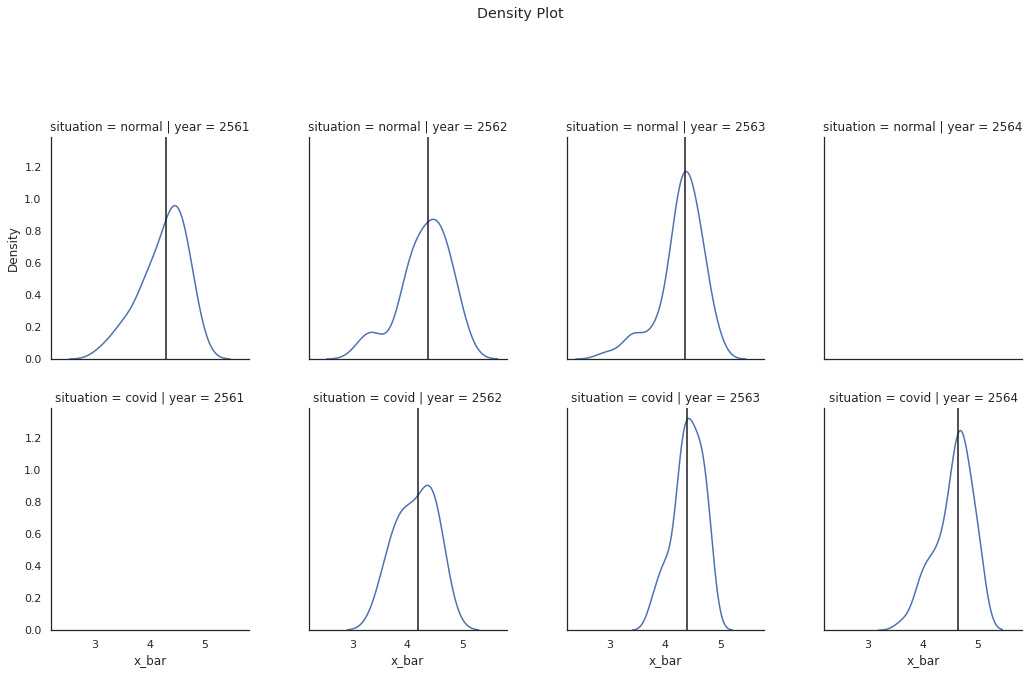

In [ ]:
sns.set_style("white")

g = sns.FacetGrid(df , col="year" ,row='situation' , col_order=sorted(df['year'].unique()) )
g = g.map(sns.kdeplot , "x_bar")
g = g.map(lambda y, **kw: plt.axvline(y.median(), color="k"), 'x_bar')

g.fig.set_size_inches(15,10)
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle("Density Plot")
sns.despine()

**คำอธิบายโค้ด**
1.  ใช้ libary seaborn
2.  กำหนดตัวแปร g ใช้ฟังก์ชั่น FacetGrid เพื่อแบ่งกราฟเป็น 8 กราฟ โดยคอลัมน์แบ่งตามปี และ แถวแบ่งตามสถานการณ์
3. ใช้ฟังก์ชั่น map เพื่อกำหนดภาพรวมของกราฟ โดยกำหนดให้แกน x เป็น x_bar และ ชนิดของกราฟเป็น density plot
4. ใช้ฟังก์ชั่น refline เพื่อสร้างเส้นอ้างอิงโดยกำหนดค่าอ้างอิงคือค่า median ต่อปี และ สถานการณ์ 
5. เรียกใช้ตัวแปร fig แล้วใช้ฟังก์ชั่น subplots_adjust เพื่อเลื่อนtitleให้สูงขึ้น และใช้ฟังก์ชั่น suptitle เพื่อตั้งชื่อ(title)ให้กราฟ


**สาเหตุการทำกราฟ**
* เพื่อแสดงรูปแบบการแจกแจงความถี่โดยรวม ของข้อมูลในแต่ละปี/สถานการณ์

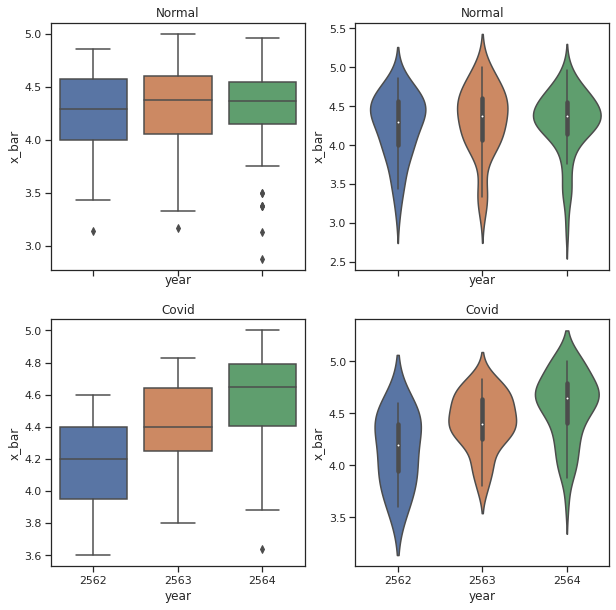

In [ ]:
sns.set_theme(style="ticks")
fig, axes = plt.subplots(2, 2 ,sharex=True, figsize=(10,10))

sns.boxplot(ax=axes[0,0], data=norm.sort_values(by='year') , x='year', y='x_bar')
axes[0,0].set_title('Normal')

sns.violinplot(ax=axes[0,1] , data=norm.sort_values(by='year') , x='year', y='x_bar')
axes[0,1].set_title('Normal')

sns.boxplot(ax=axes[1,0] , data=cov.sort_values(by='year') , x='year', y='x_bar')
axes[1,0].set_title('Covid')

sns.violinplot(ax=axes[1,1] , data=cov.sort_values(by='year') , x='year', y='x_bar')
axes[1,1].set_title('Covid')

fig.show()



**คำอธิบายโค้ด**
1. ใช้ libary seaborn
2. สร้าง subplot ให้มี 2 แถว 2 คอลัมน์ และกำหนดขนาด
3. สร้าง boxplot ในแถวที่ 1 คอลัมน์ที่ 1 โดยอิงข้อมูลจาก norm ที่เรียงตามปี กำหนดแกน x เป็นปี แกน y เป็น x_bar และกำหนดชื่อเป็น Normal ซึ่งแสดงถึงภาวะปกติ
4. สร้าง violin plot ในแถวที่ 1 คอลัมน์ที 2 โดยอิงข้อมูลจาก norm ที่เรียงตามปี กำหนดแกน x เป็นปี แกน y เป็น x_bar และกำหนดชื่อเป็น Normal ซึ่งแสดงถึงภาวะปกติ
5. สร้าง boxplot ในแถวที่ 2 คอลัมน์ที่ 1 โดยอิงข้อมูลจาก cov ที่เรียงตามปี กำหนดแกน x เป็นปี แกน y เป็น x_bar และกำหนดชื่อเป็น Covid ซึ่งแสดงถึงภาวะโควิด
6. สร้าง violin plot ในแถวที่ 2 คอลัมน์ที 2 โดยอิงข้อมูลจาก cov ที่เรียงตามปี กำหนดแกน x เป็นปี แกน y เป็น x_bar และกำหนดชื่อเป็น Covid ซึ่งแสดงถึงภาวะโควิด


**สาเหตุการทำกราฟ**
* ต่อเนื่องจาก chart ที่แล้ว boxplot จะแสดงให้เห็นถึงค่านอกเกณฑ์(outlier) ของข้อมูล 
* violin plot  จะแสดงให้เห็นถึงการกระจายตัวของข้อมูล

In [ ]:
outlines = []
for sit in [cov,norm]:
    for year in sorted(sit['year'].unique()): 
        q3 = sit.loc[(sit['year'] == year) , 'x_bar'].quantile(0.75) 
        q1 = sit.loc[(sit['year'] == year) , 'x_bar'].quantile(0.25)
        iqr = q3 - q1
        outline = sit[(sit['year'] == year)&((sit['x_bar'] > q3 + (1.5 * iqr)) | (sit['x_bar'] < q1 - (1.5 *iqr))) ]
        outlines.append(outline)
outliner  = pd.concat(outlines)
outliner.pivot_table(index=['situation','year', 'subject','topic','ข้อคำถาม'], values='x_bar' )

x_bar
situation year subject topic                                           ข้อคำถาม                                                 
covid     2564 YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างปร...   3.64
normal    2561 YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.14
          2562 FGL497  ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้ สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุณ...   3.17
          2563 YRY790  ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย            กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสน...   3.13
                                                                       ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง        3.38
                                                                       สอนให้คิด วิเคราะห์ วิจารณ์                          3.38
                                                                       แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้                  2.88
                                                                       ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี                        3.50
                       ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน               ผู้สอนชี้แนะจุดมุ่งหมายประเด็นหรือข้อสรุปที่เป็...   3.38
                                                                       ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการเ...   3.50

**คำอธิบายโค้ด**
1. สร้าง listว่างชื่อ outlines
2. loop แต่ละสถานการณ์
3. ในแต่ละสภานการณ์ loop ปีแต่ละปีที่มีในสถาการณ์นั้นๆ
4. ในแต่ละปีหา quartile ที่ 3 และที่ 1 ของข้อมูล และนำมาหา IQR หรือ Inter quartile range เพื่อนำมาหา outlier ในแต่ละปี ตามสูตร [ q1 - 1.5(iqr) และ q3 + 1.5(iqr) ]
5. นำoutline แต่ละตัวไปเก็บใน list outlines
6. สร้างตารางที่แสดง outliner ทั้งหมด

In [ ]:
def pvt(data , year) :   
    pvt = data.pivot_table(index = ['year' , 'sem', "subject" ] , values= 'x_bar' , aggfunc= 'mean').reset_index()
    pvt.loc[pvt['year'] == year ,'diff']  =  pvt.loc[pvt['year'] == year ,'x_bar']  - pvt['x_bar'].mean() 
    pvt['color'] = ""
    ind = 0
    for i in pvt['diff']  :
        if i > 0 :
            pvt.iloc[ind , 5] = 'green'
            ind += 1
        else: 
            pvt.iloc[ind , 5] = 'red'
            ind+=1
    pvt["dec"] = pvt['diff'].round(3)
    pvt["mean"] = pvt.loc[pvt['year'] == year ,'x_bar'].mean() 
    return pvt[pvt['year'] == year]

**คำอธิบายโค้ด**
1. สร้างฟังก์ชั่น pvt โดยรับพารามิเตอร์จาก data และ year
2. กำหนดตัวแปร pvt เพื่อสร้าง pivot_table ที่อิงข้อมูลจากตารางใน data โดยกำหนด dimension  คือ year, sem, subject  measurement  คือ x_bar แล้วหาค่าเฉลี่ย
3. หาผลต่างระหว่างค่าเฉลี่ยของสถานการณ์ต่อปีกับค่าเฉลี่ยของแต่ละวิชาแล้วเก็บไว้ในตัวแปร diff 
4. สร้าง coloum color ที่เป็น Nan และ กำหนดตัวแปร ind = 0
5. สร้าง for loop ในการ loop แต่ละครั้งถ้าค่า diff มากว่า 0 ให้ column color = green แต่ถ้าน้อยกว่า 0 ให้ coloum color = red และในการ loop แต่ละครั้งกำหนดให้ค่า ind เพิ่มทีละ 1 เพื่อเป็นการเปลี่ยนทีละ row
6. ใช้ฟังก์ชั่น round ปัดทศนิยมให้เหลือ 3 ตำแหน่ง



In [ ]:
fig = make_subplots(rows=2, cols=4 , subplot_titles= ['Mean : 4.476','Mean : 4.476' , 'Mean : 4.476','','','Mean : 4.287','Mean : 4.287', 'Mean : 4.287'] , shared_yaxes= True)

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(cov,f'256{i}')['subject'], y= pvt(cov,f'256{i}')['diff'] , marker=  dict(color =pvt(cov,f'256{i}')['color']) , text= pvt(cov,f'256{i}')['dec']  ),
        row=2, col=i
)

for i in range(1,5):
    fig.add_trace(
        go.Bar(x=pvt(norm,f'256{i}')['subject'], y=pvt(norm,f'256{i}')['diff'] , marker=  dict(color = pvt(norm,f'256{i}')['color']), text= pvt(norm,f'256{i}')['dec']),
        row=1, col=i
)

for i in range(1,5):
    fig.update_xaxes(title_text= f"256{i}", row=2, col=i)

fig.update_yaxes(title_text= "Normal", row=1, col=1)
fig.update_yaxes(title_text= "Covid"  ,  row=2, col=1  )
fig.update_layout(showlegend=False, height=1000, width=2000 ,title_text="Difference From Mean" , font = dict(size = 18))
fig.update_traces(textposition='auto')

fig.show()


**คำอธิบายโค้ด**
1. กำหนดตัวแปร fig สร้าง subplot โดยมี 2 แถว 4 คอลัมน์ และกำหนดชื่อของแต่ละกราฟ
2. สร้าง for loop เพื่อสร้างกราฟแท่งแถวที่ 2 จำนวน 4 กราฟ อิงข้อมูลจาก situation covid โดยในการ loop แต่ละครั้งแกน x จะเป็นวิชาในปีนั้น แกน y จะเป็นผลต่างระหว่างค่าเฉลี่ยของปีนั้นกับค่าเฉลี่ยของวิชาในปีนั้น สีของกราฟแท่งจะขึ้นอยู่กับ coloum color และค่าของ diff จะมีทศนิยม 3 ตำแหน่งตามที่กำหนดไว้ใน dec
3. สร้าง for loop เพื่อสร้างกราฟแท่งแถวที่ 1 จำนวน 4 กราฟ อิงข้อมูลจาก situation normal ในการ loop แต่ละครั้งแกน x จะเป็นวิชาในปีนั้น แกน y จะเป็นผลต่างระหว่างค่าเฉลี่ยของปีนั้นกับค่าเฉลี่ยของวิชาในปีนั้น โดยสีของกราฟแท่งจะขึ้นอยู่กับ coloum color และค่าของ diff จะมีทศนิยม 3 ตำแหน่งตามที่กำหนดไว้ใน dec
4. สร้าง for loop เพื่อกำหนดชื่อกราฟแต่ละ coloum เป็นปีแต่ละปี
5. กำหนดชื่อในแนวแกน y แถวที่ 1 เป็น normal แถวที่ 2 เป็น covid
6. กำหนดความสูงและความกว้างของกราฟทุกอัน และกำหนดชื่อกับขนาดฟ้อนต์ของชื่อ subplot

**สาเหตุการทำกราฟ**
* เพื่อแสดงความแตกต่างระหว่าง คะแนนเฉลี่ยต่อปี และ สถานการณ์ กับ คะแนนเฉลี่ยของแต่ละวิชา

# **บทสรุป**
จากกราฟทั้งหมดสามารถสรุปได้โดยกราฟ Tree map ดังต่อไปนี้

*   แสดงถึงสัดส่วนสถานการณ์/ปี/วิชา/section/หัวข้อ/คำถามตามลำดับ ของค่านอกเกณฑ์ทั้งหมด
*   ความเข้มของสีใน layout สื่อถึง x-bar ที่น้อยลง ซึ่งบ่งบอกถึงค่าของ outliner ที่ไกลขึ้น



In [ ]:

fig = px.treemap(outliner , path=[ 'degree' ,'situation','year','subject','section' , 'topic' , 'ข้อคำถาม' ] , values='x_bar' ,  color='x_bar', hover_data=['x_bar'],
                  color_continuous_scale= 'ice',
                  color_continuous_midpoint=np.average(outliner['x_bar']) ,
                  width=2000, height=1000)


fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_layout({
'plot_bgcolor':'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})
fig.update_traces(textinfo = 'label')
fig.update_layout(uniformtext=dict(minsize=14, mode='show'))
fig.show()

**คำอธิบายโค้ด**
1.   กำหนดตัวแปร fig เพื่อสร้าง tree map โดยอิงข้อมูลจาก outlier กำหนด dimension  เป็น degree, situation, year, subject , section , topic , ข้อคำถาม measurement  คือ x_bar และให้สีใน layout เปลี่ยนตามค่าx_bar กำหนดgradiantเป็นรูปแบบ 'ice'
2. กำหนดขนาดของกราฟ
3. ใช้ฟังก์ชั่น update_layout เพื่อกำหนดตำแหน่ง
ของกราฟ และทำbackgroundเป็นpng
4. ใช้ฟังก์ชั่น update_traces เพื่อใส่ label ลงในแต่ละ layout
5. กำหนดขนาดตัวอักษร